In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels.api as sm
from scipy import stats

In [2]:
digimarkt = pd.read_csv(r"C:\Users\admin\digital_markting.csv")

In [3]:
digimarkt.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [4]:
digimarkt.duplicated().value_counts()

False    8000
Name: count, dtype: int64

In [5]:
digimarkt.shape

(8000, 20)

<Axes: xlabel='Age', ylabel='Density'>

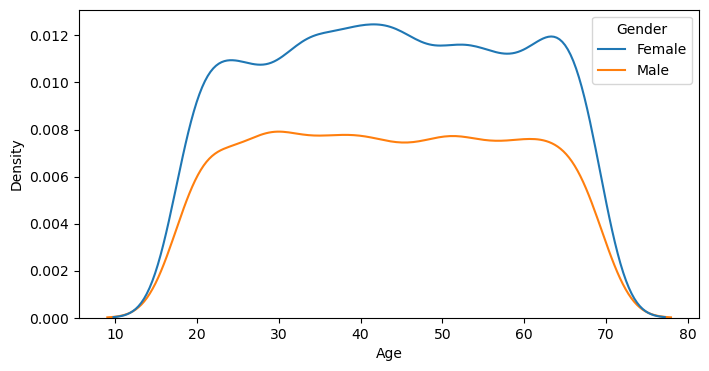

In [6]:
fig, axs = plt.subplots(1,1, figsize=(8,4))
sns.kdeplot(data =digimarkt,x='Age',hue = 'Gender',ax = axs)

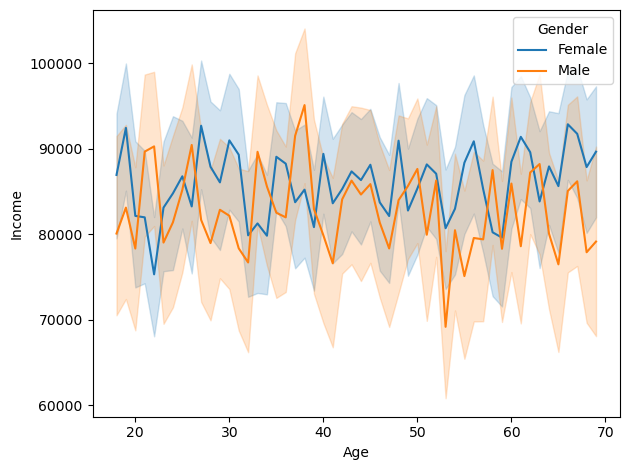

In [7]:
sns.lineplot(data = digimarkt,x='Age' ,y= 'Income',hue = 'Gender')
plt.tight_layout()
plt.show()

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


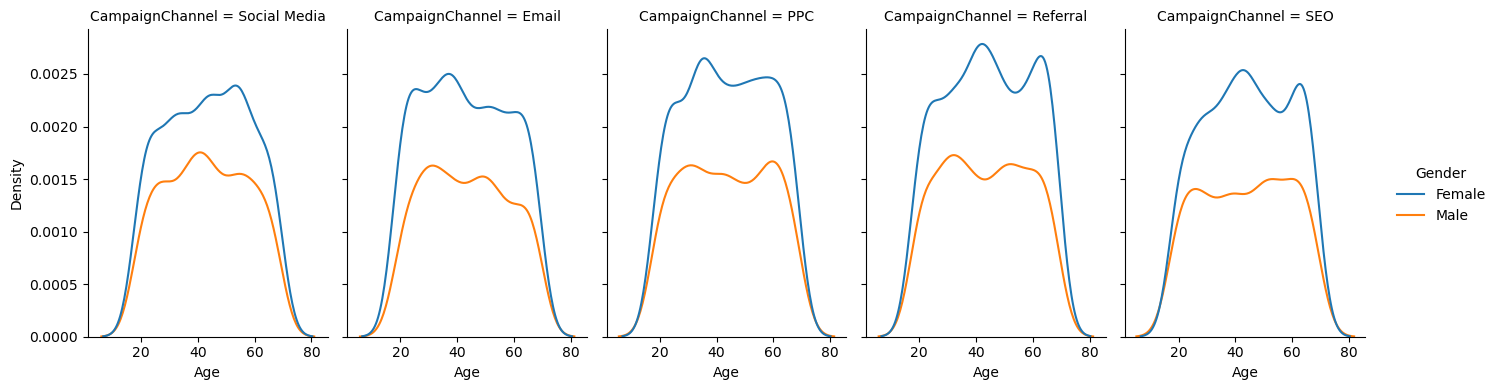

In [8]:
sns.displot(data=digimarkt, x="Age", hue="Gender", col="CampaignChannel", kind="kde",height=4, aspect=.7)
plt.show()

In [9]:
digimarkt.groupby(['CampaignChannel','Gender'])['Income'].mean().reset_index()

,CampaignChannel,Gender,Income
0,Email,Female,83849.410042
1,Email,Male,81511.344426
2,PPC,Female,89483.885000
3,PPC,Male,83634.722137
4,Referral,Female,85186.772814
5,Referral,Male,81826.701649
6,SEO,Female,84930.006356
7,SEO,Male,81461.836634
8,Social Media,Female,86071.197294
9,Social Media,Male,85159.408228


In [10]:
digimarkt.groupby(['CampaignChannel','Gender'])['Gender'].value_counts().reset_index()

,CampaignChannel,Gender,count
0,Email,Female,956
1,Email,Male,601
2,PPC,Female,1000
3,PPC,Male,655
4,Referral,Female,1052
5,Referral,Male,667
6,SEO,Female,944
7,SEO,Male,606
8,Social Media,Female,887
9,Social Media,Male,632


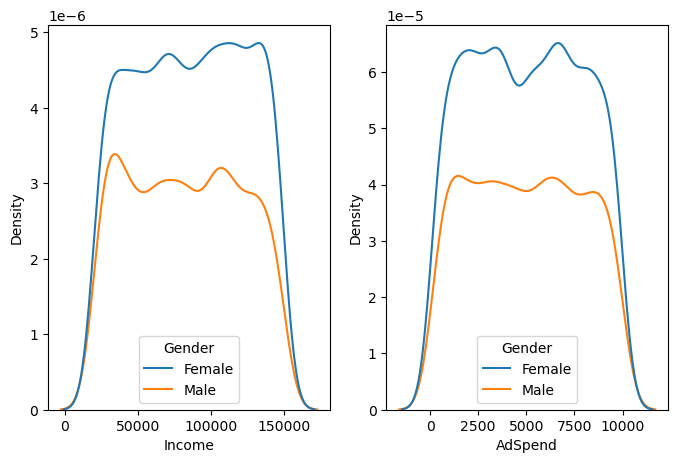

In [11]:

fig, axs = plt.subplots(1,2,figsize=(8,5))
sns.kdeplot(data=digimarkt,x ='Income',hue = 'Gender',ax = axs[0])
sns.kdeplot(data=digimarkt,x ='AdSpend',hue = 'Gender',ax = axs[1])
plt.show()

In [12]:
def income_bracket(row):
    if row['Income']<30000:
        return 'Level 1'
    elif row['Income']>=30000 and row['Income']<50000:
        return 'Level 2'
    elif row['Income']>=50000 and row['Income']<=100000:
        return 'Level 3'
    else:
        return 'Level 4'
    

In [13]:
temp_data = digimarkt[['Income','AdSpend','CampaignChannel','CampaignType']]

In [14]:
temp_data['Income_Bracket'] =temp_data.apply(income_bracket,axis = 1)

C:\Users\admin\AppData\Local\Temp\ipykernel_21048\864697009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['Income_Bracket'] =temp_data.apply(income_bracket,axis = 1)


In [15]:
temp_data.groupby(['Income_Bracket','CampaignChannel','CampaignType'])['AdSpend'].mean().reset_index().sort_values('AdSpend',ascending = False).head(30)

,Income_Bracket,CampaignChannel,CampaignType,AdSpend
14,Level 1,SEO,Conversion,6181.104906
13,Level 1,SEO,Consideration,5894.943786
3,Level 1,Email,Retention,5694.696066
62,Level 4,Email,Conversion,5659.988415
4,Level 1,PPC,Awareness,5549.962777
30,Level 2,Referral,Conversion,5456.599727
11,Level 1,Referral,Retention,5447.595839
63,Level 4,Email,Retention,5372.729820
8,Level 1,Referral,Awareness,5365.255713
36,Level 2,Social Media,Awareness,5355.020211


In [16]:
digimarkt.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [17]:
digimarkt.groupby(['CampaignChannel','CampaignType'])['AdSpend'].mean().reset_index().sort_values('AdSpend', ascending = False)

,CampaignChannel,CampaignType,AdSpend
3,Email,Retention,5204.585578
16,Social Media,Awareness,5183.625376
2,Email,Conversion,5169.923986
8,Referral,Awareness,5151.421571
12,SEO,Awareness,5132.001477
7,PPC,Retention,5008.451401
9,Referral,Consideration,5004.175064
5,PPC,Consideration,5003.265222
10,Referral,Conversion,5002.671732
4,PPC,Awareness,4992.213287


In [18]:
digimarkt_2 = digimarkt.copy()    

In [19]:
Click_Through_Rate = digimarkt_2['ClickThroughRate'].multiply(100)
Conversion_Rate = digimarkt_2['ConversionRate'].multiply(100)

In [20]:
digimarkt_2.insert(7,'Click_Through_Rate',Click_Through_Rate)
digimarkt_2.insert(8,'Conversion_Rate',Conversion_Rate)

In [21]:
del digimarkt_2['ClickThroughRate']
del digimarkt_2['ConversionRate']

In [22]:
digimarkt_2=digimarkt_2.rename(columns={'Click_Through_Rate':'ClickThroughRate','Conversion_Rate':'ConversionRate'})

G:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


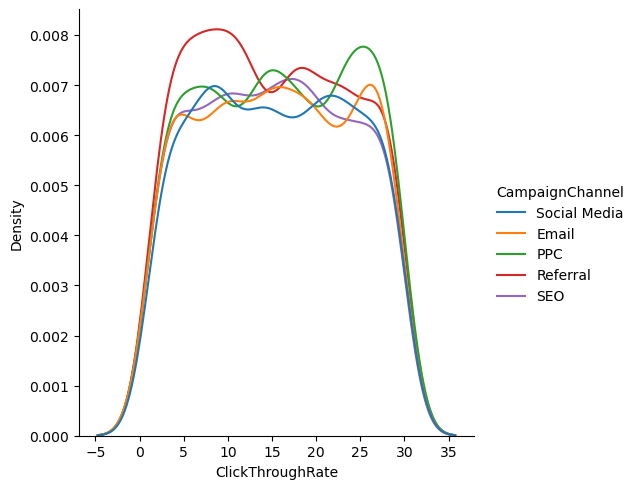

In [23]:
sns.displot(digimarkt_2, x="ClickThroughRate", hue="CampaignChannel", kind="kde")
plt.show()

In [24]:
clickrate =digimarkt_2.groupby(['CampaignChannel','CampaignType'])['ClickThroughRate'].mean().reset_index().sort_values('ClickThroughRate',ascending = False)
rate_comp = digimarkt_2.groupby(['CampaignChannel','CampaignType'])['ConversionRate'].mean().reset_index().sort_values('ConversionRate',ascending = False)
rate_comp.insert(3,'ClickThroughRate',clickrate['ClickThroughRate'])

In [25]:
rate_comp

,CampaignChannel,CampaignType,ConversionRate,ClickThroughRate
18,Social Media,Conversion,11.330181,16.120670
13,SEO,Consideration,11.008654,15.342086
4,PPC,Awareness,10.869332,16.448164
1,Email,Consideration,10.667802,15.328593
2,Email,Conversion,10.655726,15.750836
17,Social Media,Consideration,10.611510,14.964085
16,Social Media,Awareness,10.528099,15.157495
8,Referral,Awareness,10.520735,15.615983
15,SEO,Retention,10.444873,15.184163
0,Email,Awareness,10.419570,15.154516


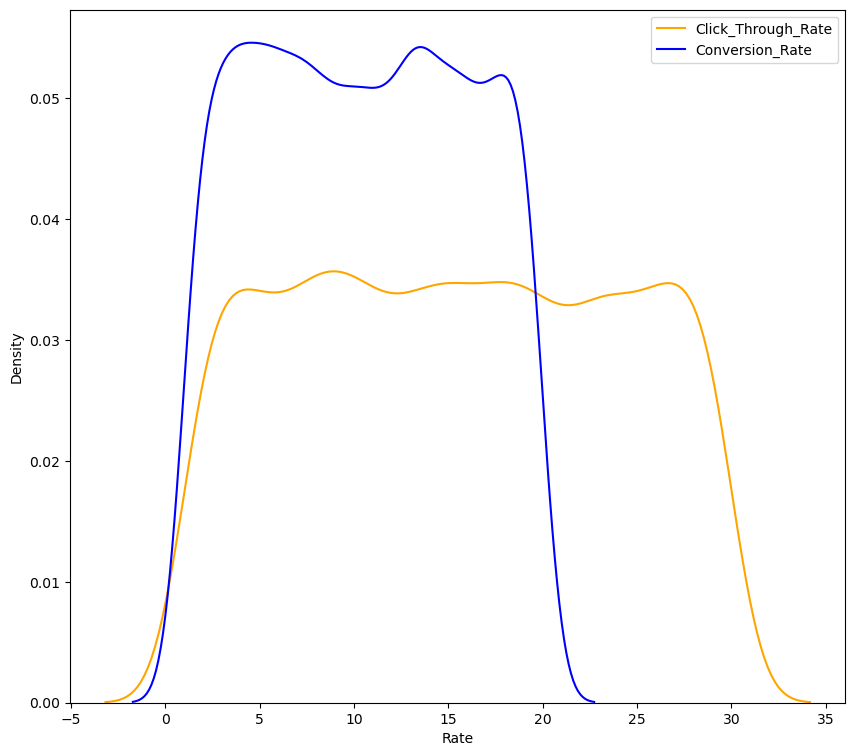

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(10, 9))
sns.kdeplot(data=digimarkt_2, x="ClickThroughRate", ax=axs, color= 'orange',label='Click_Through_Rate')
sns.kdeplot(data=digimarkt_2, x="ConversionRate", ax=axs, color = 'blue',label='Conversion_Rate')
plt.xlabel('Rate')
plt.legend()

In [27]:
web_visit=digimarkt_2.groupby(['CampaignChannel','CampaignType'])['WebsiteVisits'].mean().reset_index().sort_values('WebsiteVisits',ascending = False)
page_visit = digimarkt_2.groupby(['CampaignChannel','CampaignType'])['PagesPerVisit'].mean().reset_index().sort_values('PagesPerVisit',ascending = False)
web_visit.insert(3,'PagesPerVisit',page_visit['PagesPerVisit'])

In [28]:
web_visit

,CampaignChannel,CampaignType,WebsiteVisits,PagesPerVisit
13,SEO,Consideration,26.983740,5.462731
1,Email,Consideration,26.047146,5.544656
16,Social Media,Awareness,25.965517,5.600530
4,PPC,Awareness,25.618932,5.559037
10,Referral,Conversion,25.510112,5.534038
11,Referral,Retention,25.373853,5.382883
17,Social Media,Consideration,24.987654,5.625947
19,Social Media,Retention,24.867568,5.494239
18,Social Media,Conversion,24.675749,5.619527
3,Email,Retention,24.672222,5.541225


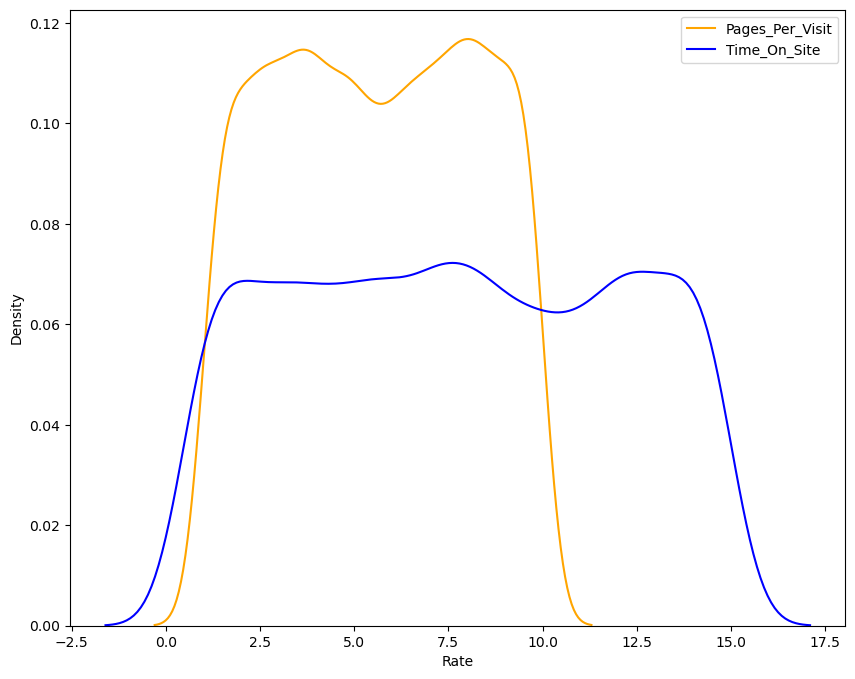

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(data=digimarkt_2, x="PagesPerVisit", ax=axs, color= 'orange',label='Pages_Per_Visit')
sns.kdeplot(data=digimarkt_2, x="TimeOnSite", ax=axs, color = 'blue',label='Time_On_Site')
plt.xlabel('Rate')
plt.legend()

In [30]:
digimarkt_2.groupby('CampaignChannel')['SocialShares'].value_counts().reset_index().sort_values('SocialShares', ascending = False).head(30)

,CampaignChannel,SocialShares,count
351,SEO,99,15
247,Referral,99,17
465,Social Media,99,14
92,Email,99,10
134,PPC,99,18
241,Referral,98,18
448,Social Media,98,15
50,Email,98,16
395,SEO,98,9
161,PPC,98,15


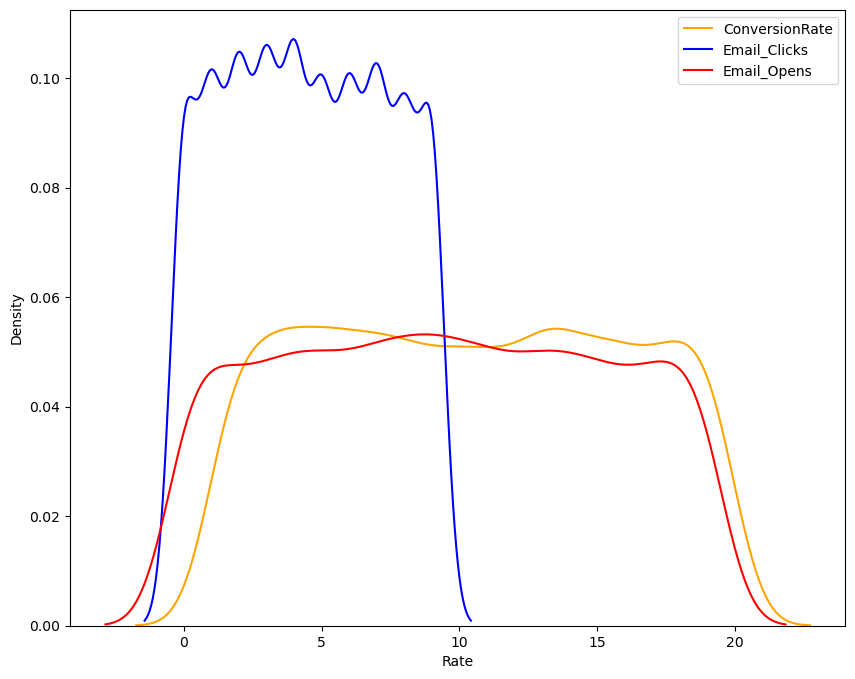

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(data=digimarkt_2, x="ConversionRate", ax=axs, color= 'orange',label='ConversionRate')
sns.kdeplot(data=digimarkt_2, x="EmailClicks", ax=axs, color = 'blue',label='Email_Clicks')
sns.kdeplot(data=digimarkt_2, x="EmailOpens", ax=axs, color= 'red',label='Email_Opens')
plt.xlabel('Rate')
plt.legend()

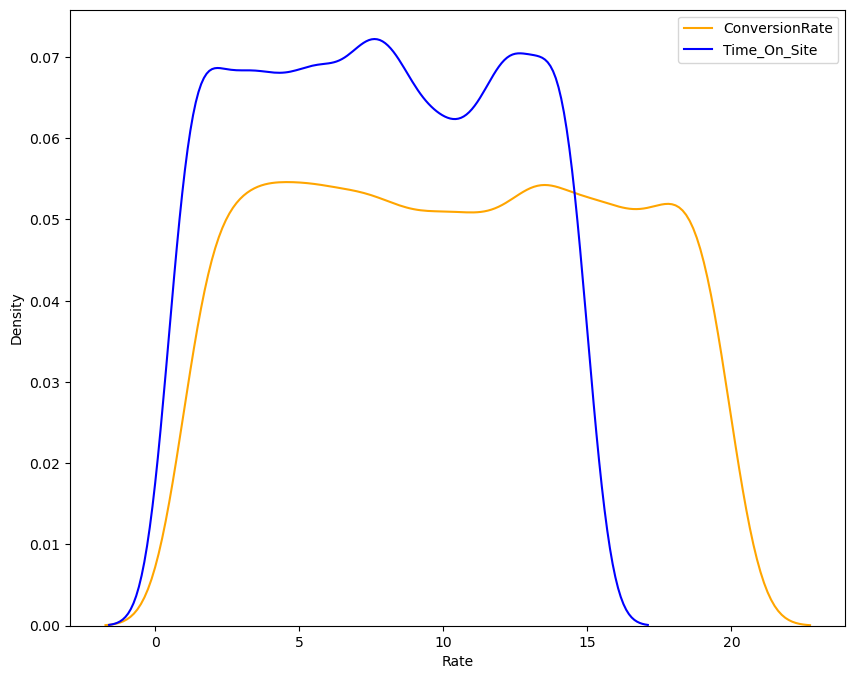

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
sns.kdeplot(data=digimarkt_2, x="ConversionRate", ax=axs, color= 'orange',label='ConversionRate')
sns.kdeplot(data=digimarkt_2, x="TimeOnSite", ax=axs, color = 'blue',label='Time_On_Site')
#sns.kdeplot(data=digimarkt_2, x="EmailOpens", ax=axs, color= 'red',label='Email_Opens')
plt.xlabel('Rate')
plt.legend()

In [33]:
share_clickrate=digimarkt_2.groupby('CampaignChannel')['SocialShares'].value_counts().reset_index().sort_values('SocialShares', ascending = False)
temp_data = digimarkt_2.groupby(['CampaignChannel','SocialShares'])['ClickThroughRate'].mean().reset_index().sort_values('ClickThroughRate', ascending = False)
share_clickrate.insert(3,'Click_Through_Rate',temp_data['ClickThroughRate'])

In [34]:
temp_data

,CampaignChannel,SocialShares,ClickThroughRate
105,PPC,5,22.838991
10,Email,10,21.566557
453,Social Media,53,21.330901
482,Social Media,82,20.971051
178,PPC,78,20.828416
...,...,...,...
245,Referral,45,10.188425
301,SEO,1,9.719819
409,Social Media,9,9.694275
404,Social Media,4,8.839023


<Axes: xlabel='SocialShares', ylabel='ClickThroughRate'>

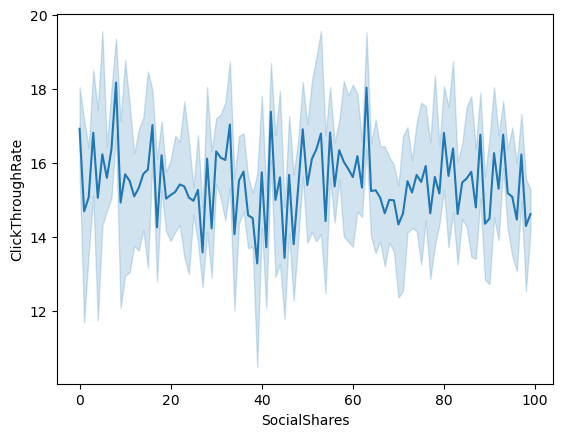

In [35]:
sns.lineplot(data = temp_data,x='SocialShares' ,y= 'ClickThroughRate')


In [36]:
share_clickrate.head(30)

,CampaignChannel,SocialShares,count,Click_Through_Rate
351,SEO,99,15,17.559160
247,Referral,99,17,11.640532
465,Social Media,99,14,18.426237
92,Email,99,10,13.812287
134,PPC,99,18,10.481783
241,Referral,98,18,16.145008
448,Social Media,98,15,17.676112
50,Email,98,16,13.045344
395,SEO,98,9,13.341214
161,PPC,98,15,19.300326


In [37]:
digimarkt_2.groupby(['Gender','CampaignChannel'])['PreviousPurchases'].value_counts().reset_index().sort_values('PreviousPurchases',ascending = False).head(30)

,Gender,CampaignChannel,PreviousPurchases,count
67,Male,PPC,9,62
47,Female,Social Media,9,80
21,Female,Referral,9,114
3,Female,Email,9,98
95,Male,Social Media,9,61
33,Female,SEO,9,99
52,Male,Email,9,64
71,Male,Referral,9,75
82,Male,SEO,9,61
12,Female,PPC,9,105


In [38]:
digimarkt_2.groupby(['CampaignChannel','CustomerID'])['LoyaltyPoints'].value_counts().reset_index().sort_values('LoyaltyPoints',ascending = False).head(30)

,CampaignChannel,CustomerID,LoyaltyPoints,count
3553,Referral,9689,4999,1
5801,SEO,12346,4999,1
4565,Referral,14445,4999,1
4595,Referral,14549,4998,1
7983,Social Media,15911,4997,1
5140,SEO,9145,4994,1
5409,SEO,10445,4994,1
1957,PPC,9904,4994,1
5654,SEO,11659,4994,1
302,Email,9478,4994,1


In [39]:
digimarkt_2['LoyaltyPoints_Adspent']=(digimarkt_2['LoyaltyPoints']/digimarkt_2['AdSpend'])*100


In [40]:
digimarkt_2[['AdSpend','LoyaltyPoints','PreviousPurchases','LoyaltyPoints_Adspent']].sort_values('LoyaltyPoints_Adspent', ascending = False).head(30)

,AdSpend,LoyaltyPoints,PreviousPurchases,LoyaltyPoints_Adspent
5838,115.086549,4906,8,4262.878699
4660,103.956957,4104,4,3947.787752
6271,121.385031,4649,3,3829.961544
409,112.304499,4211,9,3749.627177
3492,100.668227,3605,6,3581.070332
1714,121.520459,3612,8,2972.338994
4925,174.934098,4959,7,2834.781818
2964,170.366696,4684,4,2749.363640
5942,183.243466,4981,5,2718.241536
1849,103.409243,2676,7,2587.776414
